Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, re, subprocess, sys, json, glob
#from molmod import *
#from molmod.io import FCHKFile
#from molmod.io.xyz import XYZReader, XYZFile
import requests
#import wts

In [2]:
plots = "/home/hagen/Masterarbeit/Arbeit/MasterThesis/img/results/"

In [3]:
plots = "plots/"

print(2)

In [4]:
2

2

get_dihed.py

In [5]:
os.getcwd()

'/home/hagen/anaconda3/bin/hemejpn'

take_properties.py

In [6]:
df = pd.DataFrame({2:["a","b"],3:[1,2]})
df  =df.set_index(2)
#df.index = df.index.str.upper()

df

,3
2,
a,1
b,2


In [7]:
if(False):
    wts.TCL-Skript()
    wts.dihedpdb()        
    wts.prepare_gaussian_logs().core()
    wts.onecsv()

    wts.read_redpot_lit()

In [8]:
dfex_1 =pd.read_csv("tables/mono.csv")
dfex_1  =dfex_1.set_index("pdb")
dfex_1 = dfex_1[[ "Elektrode","Ligand","EMv"]]
dfex_3 = pd.read_csv("tables/duplicated_moded.csv")
dfex_4 = dfex_3.drop_duplicates("PDB", keep=False)
dfex_4= dfex_4.set_index("pdb")#.rename({"PDB":"pdb"})
dfex_4 = dfex_4[[ "Elektrode","Ligand","EMv"]]

dfex_lit = dfex_1.append(dfex_4)
dfex_lit.index = dfex_lit.index.str.upper()
dfex_lit =dfex_lit.rename(columns = {"EMv":"Em_lit"})
df_axlig = pd.read_csv("tables/axligand.csv")
df_axlig = df_axlig.rename(columns={"# PDB": "pdb","ligand" : "ligand_pydish"}).set_index("pdb")
df_axlig = df_axlig[["ligand_pydish","saddling","ruffling"]]

df_calc = pd.read_csv("tables/calculated.csv")
df_calc = df_calc.drop("Unnamed: 0", axis=1).set_index("pdb")
_dihedral = pd.read_csv("tables/Dihedral.csv")
_dihedral = _dihedral.rename(columns={"Unnamed: 0":"PDB"})
_dihedral = _dihedral.set_index("PDB")

df_ruffling = pd.read_csv("tables/Ruffling.csv").rename(columns = {"Unnamed: 0":"PDB"}).set_index("PDB")
df_saddling = pd.read_csv("tables/Saddling.csv").rename(columns = {"Unnamed: 0":"PDB"}).set_index("PDB")
df_ruffling_all = df_ruffling.copy()
df_saddling_all = df_saddling.copy()
modelist1 = [i for i in df_ruffling_all.index if i in dfex_lit.index]
modelist2 = [i for i in df_saddling_all.index if i in dfex_lit.index]
if (modelist2 == modelist1):
    print("ruffling + saddling")
else:
    raise Error
df_ruffling_all = df_ruffling_all.loc[modelist1]
df_saddling_all = df_saddling_all.loc[modelist1]
    
    
    
    
    
    
    
    
dfHemetype = pd.read_csv("tables/Hemetypes.csv")
dfHemetype = dfHemetype.set_index("pdb")


pdb_calc  = list(set(df_calc.index))
pdb_lit  = list(set(dfex_lit.index))
#print(    ([i for i in pdb_calc  if not i in pdb_lit])   )

pdbavaible = [i for i in pdb_calc if i in pdb_lit]
pdbavaiblepdb_calc  = list(set(df_calc.index))
pdb_lit  = list(set(dfex_lit.index))
#print(    ([i for i in pdb_calc  if not i in pdb_lit])   )

pdbavaible = [i for i in pdb_calc if i in pdb_lit]
#pdbavaible

df_ruffling = df_ruffling.loc[pdbavaible]
df_saddling = df_saddling.loc[pdbavaible]

ruffling + saddling


# was ist mit 2gms?

# 1vb6 nochmal überlegen, gab zwei hemes mit untershcielcihen liganden

In [9]:
if not all(i in df_ruffling.index for i in pdbavaible):
    print(f"ruffling fehlt{[i for i in pdbavaible if i not in df_ruffling.index]}")
    
if not all(i in _dihedral.index for i in pdbavaible):
    print(f"Dihedral fehlt{[i for i in pdbavaible if i not in _dihedral.index]}")

if not all(i in df_saddling.index for i in pdbavaible):
    print(f"saddling fehlt{[i for i in pdbavaible if i not in df_saddling.index]}")    

In [10]:
df_ruffling.head()

,C3_SW_C1_SW_C1_WS_C3_WS,C3_SO_C1_SO_C1_OS_C3_OS,C3_WN_C1_WN_C1_NW_C3_NW,C3_NO_C1_NO_C1_ON_C3_ON
PDB,,,,
1CMT,-16.873663,21.657507,10.274732,-12.797701
3CCX,-6.084783,17.627942,0.529037,-14.649177
1JBQ,-1.545295,2.613317,-0.133373,-1.059655
1CCC,-8.061759,24.512677,8.360383,-28.276804
1CCG,-6.400055,16.870631,8.348551,-15.900482


In [11]:
[i for i in df_ruffling_all.index if i not in dfex_lit.index]

[]

In [12]:
df_mode = pd.DataFrame({"Em_lit":[dfex_lit.loc[i]["Em_lit"] for i in modelist1]}, index = modelist1)

df_mode["ruffling_mean"] = df_ruffling_all.mean(axis = 1)
df_mode["ruffling_max"] = df_ruffling_all.max(axis = 1)
df_mode["ruffling_min"] = df_ruffling_all.min(axis = 1)
df_mode["saddling_mean"] = df_saddling_all.mean(axis = 1)
df_mode["saddling_max"] = df_saddling_all.max(axis = 1)
df_mode["saddling_min"] = df_saddling_all.min(axis = 1)
df_mode["ruffling_max2"] = [a if abs(a)>abs(b) else b for a,b in zip(df_mode["ruffling_max"],df_mode["ruffling_min"])]
df_mode["saddling_max2"] = [a if abs(a)>abs(b) else b for a,b in zip(df_mode["saddling_max"],df_mode["saddling_min"])]

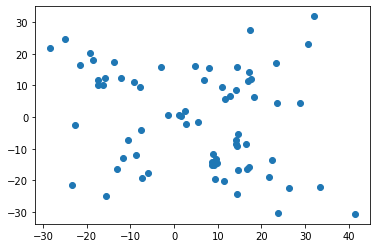

In [13]:
plt.scatter(df_mode["ruffling_max2"],df_mode["saddling_max2"])

In [14]:
[i.lower() for i in df_mode.index]

['3ccx',
 '1ewh',
 '1ycc',
 '6u97',
 '1cce',
 '1iqc_his',
 '1drm',
 '1f1f',
 '4k8f',
 '1iqc_hismet',
 '1h9x',
 '2oyy',
 '451c',
 '1be3_hismet',
 '1mz4',
 '1co6',
 '1a6k',
 '1cyo',
 '1aw3',
 '1ls9',
 '2pcb_hismet',
 '2v08',
 '1ehb',
 '351c',
 '1jp9',
 '2c1d_css',
 '1b5a',
 '5mcs',
 '1ccc',
 '1c2r',
 '1a6m',
 '1cxc',
 '2pcb',
 '1cck',
 '1ctj',
 '1jbq',
 '1hrc',
 '1qpu',
 '1moh',
 '1gu2',
 '1f1c',
 '1jp6',
 '1ynr',
 '1crc',
 '2gsm_bishis',
 '1cno',
 '1giw',
 '4mu8',
 '2c1d_met',
 '1fj0',
 '1a6g',
 '2hpd',
 '1eue',
 '1jdl',
 '1cmt',
 '1ebt',
 '1hjt',
 '1ccg',
 '2gsm',
 '1vb6',
 '1cry',
 '1dj1',
 '3cu4',
 '1flp',
 '1cyi',
 '1io3',
 '1es1',
 '1cyj',
 '1c75',
 '1fhf',
 '1cmq']

In [15]:
for i in ["1ewh","1ycc","1drm","1f1f","1h9x","1mz4","1co6","1a6k","1ls9","2v08","1ehb","1jp9","2c1d_css","5mcs","1c2r","1a6m","1cxc","2pcb","1cck","1ctj","1hrc","1moh","1gu2","1f1c","1jp6","1ynr","1crc","1cno","1giw","4mu8","1fj0","1a6g","2hpd","1ebt","1hjt","1cry","3cu4","1flp","1cyi","1io3","1cyj","1c75"]:
    try:
        if df_mode.loc[i.upper()]["saddling_max"]>50  :
            print(i)
        else:
            print(f"{i} nicht")
    except:
        2

1ewh nicht
1ycc nicht
1drm nicht
1f1f nicht
1h9x nicht
1mz4 nicht
1co6 nicht
1a6k nicht
1ls9 nicht
2v08 nicht
1ehb nicht
1jp9 nicht
2c1d_css nicht
5mcs nicht
1c2r nicht
1a6m nicht
1cxc nicht
2pcb nicht
1cck nicht
1ctj nicht
1hrc nicht
1moh nicht
1gu2 nicht
1f1c nicht
1jp6 nicht
1ynr nicht
1crc nicht
1cno nicht
1giw nicht
4mu8 nicht
1fj0 nicht
1a6g nicht
2hpd nicht
1ebt nicht
1hjt nicht
1cry nicht
3cu4 nicht
1flp nicht
1cyi nicht
1io3 nicht
1cyj nicht
1c75 nicht


In [16]:
df_mode[df_mode["saddling_max"]<50]

,Em_lit,ruffling_mean,ruffling_max,ruffling_min,saddling_mean,saddling_max,saddling_min,ruffling_max2,saddling_max2
3CCX,-181.1,-0.644245,17.627942,-14.649177,-0.525576,12.131492,-8.322564,17.627942,12.131492
1EWH,350.0,4.063519,23.391193,-16.112808,-1.327926,17.023751,-15.878838,23.391193,17.023751
1YCC,290.0,10.562476,41.349419,-8.963366,-3.500269,17.344884,-30.636351,41.349419,-30.636351
6U97,179.3,1.564556,14.284085,-9.201800,-1.321343,6.383501,-8.550658,14.284085,-8.550658
1CCE,-127.0,0.416999,24.739251,-24.883776,0.499653,24.606578,-9.457818,-24.883776,24.606578
...,...,...,...,...,...,...,...,...,...
1ES1,12.0,4.108875,14.270593,-7.884052,-1.340690,8.460821,-7.512205,14.270593,8.460821
1CYJ,370.0,7.345364,33.357478,-24.785861,-4.420944,21.510532,-22.108575,33.357478,-22.108575
1C75,47.0,0.406204,6.872086,-5.415934,-0.153335,11.705291,-8.850137,6.872086,11.705291
1FHF,-443.0,-4.589434,23.562327,-16.866547,0.842377,4.364127,-3.572184,23.562327,4.364127


In [17]:
df_mode[df_mode["saddling_max"]>50]

,Em_lit,ruffling_mean,ruffling_max,ruffling_min,saddling_mean,saddling_max,saddling_min,ruffling_max2,saddling_max2


In [18]:
df_mode_r20 = df_mode[df_mode["ruffling_max"]<20].copy()
df_mode_s5 = df_mode[df_mode["saddling_max2"]>5].copy()


Text(0, 0.5, 'Ruffling')

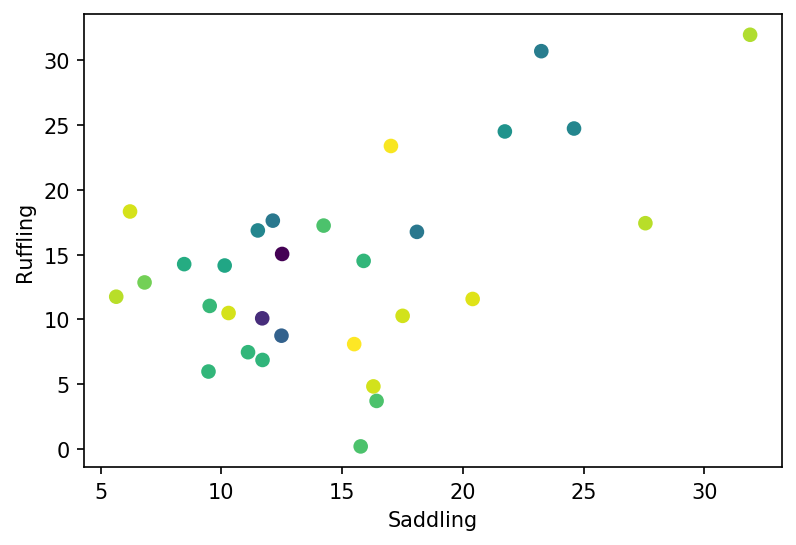

In [19]:
fig = plt.figure(dpi =150)#,figsize = [10,15])

plt.scatter(df_mode_s5["saddling_max2"],df_mode_s5["ruffling_max"], c = df_mode_s5["Em_lit"])
plt.xlabel("Saddling")
plt.ylabel("Ruffling")

/home/hagen/anaconda3/envs/KLeich/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


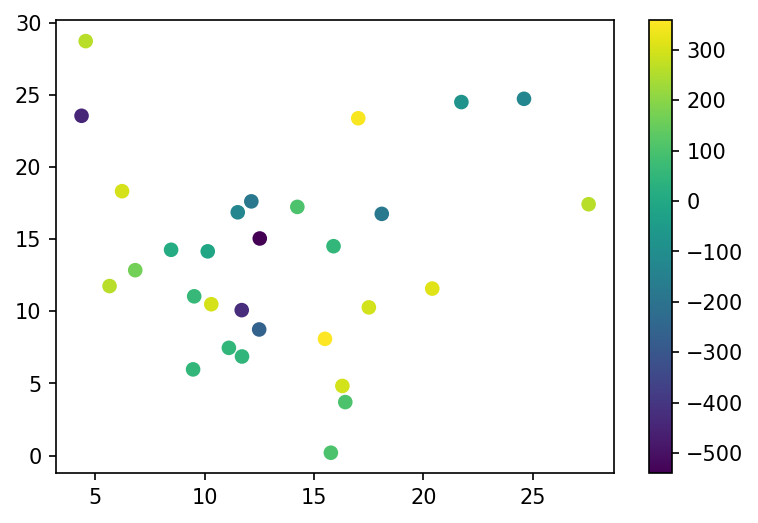

In [20]:
df_mode_t1 = df_mode[df_mode["saddling_max2"]>3][df_mode["ruffling_max"]<30].copy()
fig = plt.figure(dpi =150)#,figsize = [10,15])
plt.scatter(df_mode_t1["saddling_max2"],df_mode_t1["ruffling_max"], c = df_mode_t1["Em_lit"])
plt.colorbar()


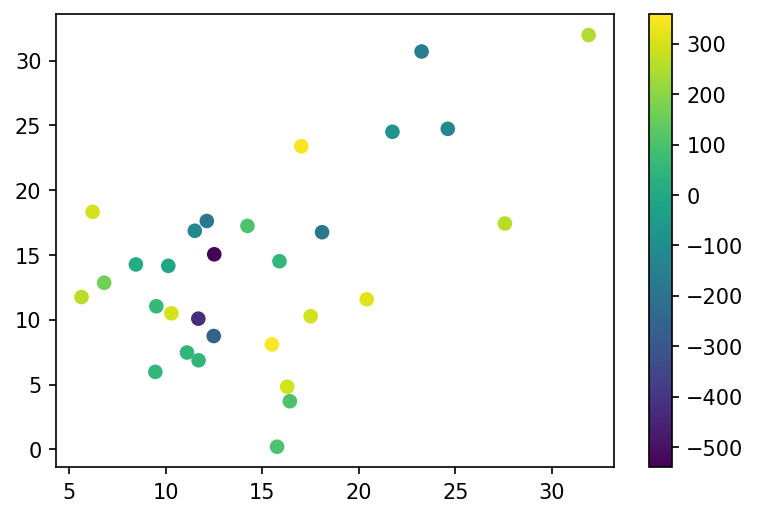

In [21]:
#df_mode_s5 = df_mode[df_mode["saddling_max2"]<4].copy()
df_mode_s4 = df_mode[df_mode["saddling_max2"]<4].copy()

fig = plt.figure(dpi =150)#,figsize = [10,15])

plt.scatter(df_mode_s5["saddling_max2"],df_mode_s5["ruffling_max"], c = df_mode_s5["Em_lit"])
plt.colorbar()

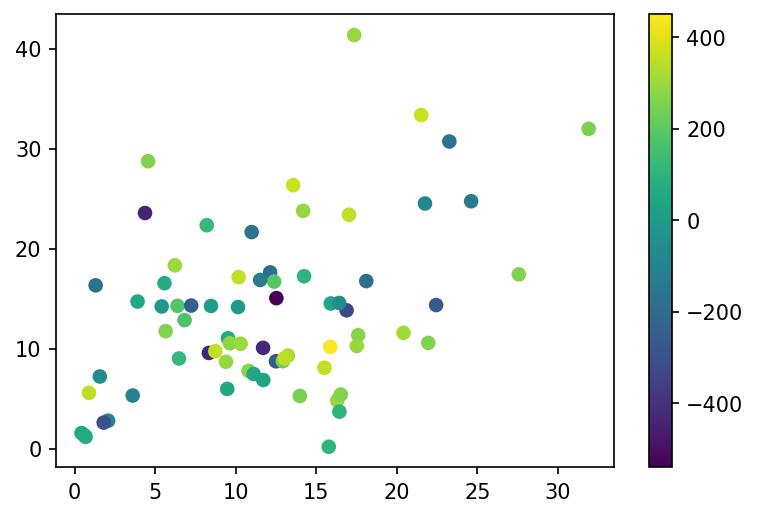

In [22]:
#df_mode_s5 = df_mode[df_mode["saddling_max2"]<4].copy()
df_mode_s4 = df_mode[df_mode["saddling_max2"]<4].copy()

fig = plt.figure(dpi =150)#,figsize = [10,15])

plt.scatter(df_mode["saddling_max"],df_mode["ruffling_max"], c = df_mode["Em_lit"])
plt.colorbar()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



In [24]:
def rounddata(i,rounding):
#    global rounding 
    return int(i/rounding+0.5)*rounding

In [25]:
def barpoint(dfbar,X,Y,rounding = 1):

    #dfbar = df_mode[["ruffling_max","Em_lit"]].copy()
    #dfbar = df_mode[df_mode["ruffling_max"]<20][["ruffling_max","Em_lit"]].copy()
    fig = plt.figure(dpi =150)#,figsize = [10,15])


    #rounding = 1

    dfbar[rounding] = [rounddata(i,rounding) for i in dfbar[X]]

    ruflist = list(set(dfbar[rounding]))
    ruflist.sort()
    emlist = [dfbar[dfbar[rounding] ==i][Y].mean() for i in ruflist]


    ax = fig.add_subplot(111)

    ax.bar(ruflist, emlist, width = rounding*0.8,fill = False)
    ax.plot(dfbar[X] , dfbar["Em_lit"],"x",c="red")
    
    ax.set_xlabel(X)
    ax.set_ylabel("$E_{red}$")
    ax.set_title(f"round on {rounding}")

    plt.show()

    #plt.bar(ruflist, emlist, width = rounding*0.8)

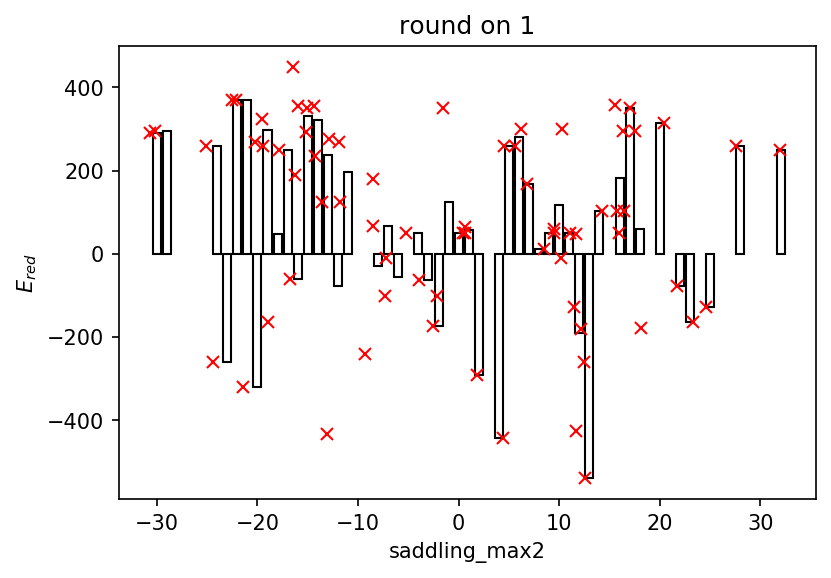

In [26]:
barpoint(df_mode, "saddling_max2","Em_lit")

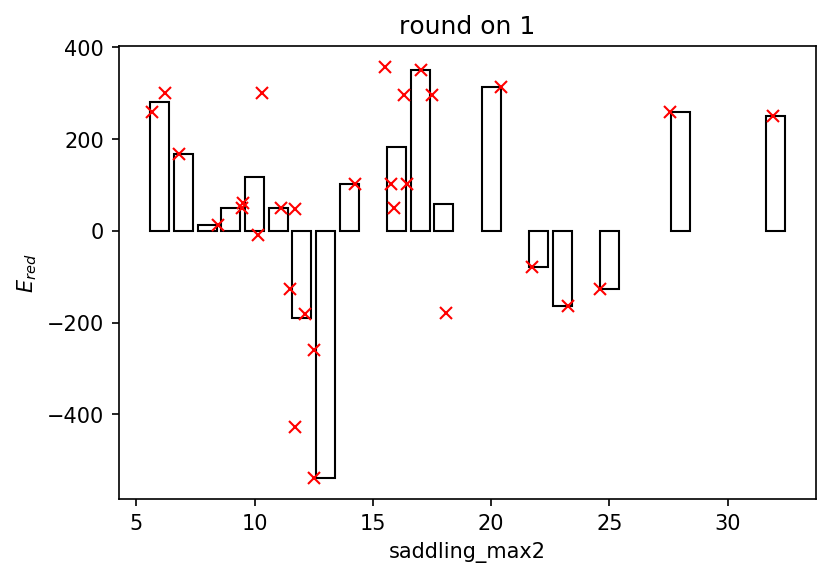

In [27]:
barpoint(df_mode_s5, "saddling_max2","Em_lit")

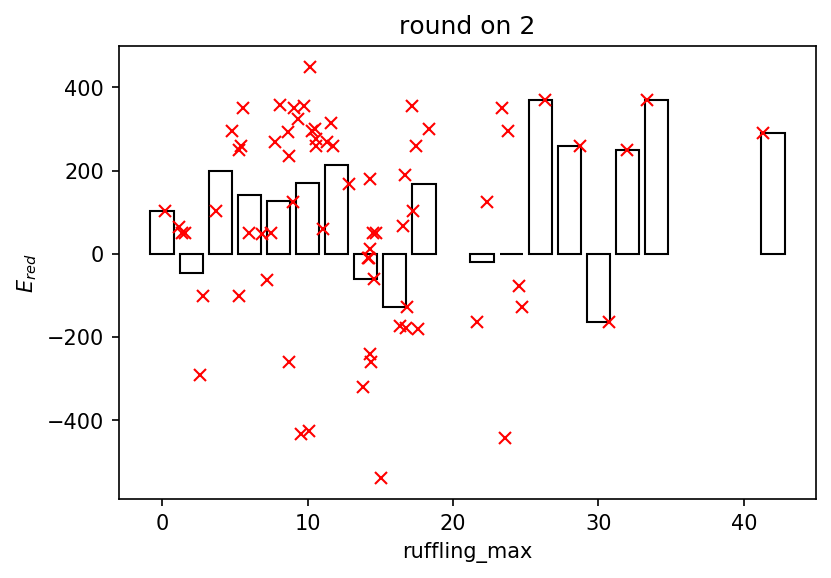

In [28]:
barpoint(df_mode, "ruffling_max","Em_lit",2)

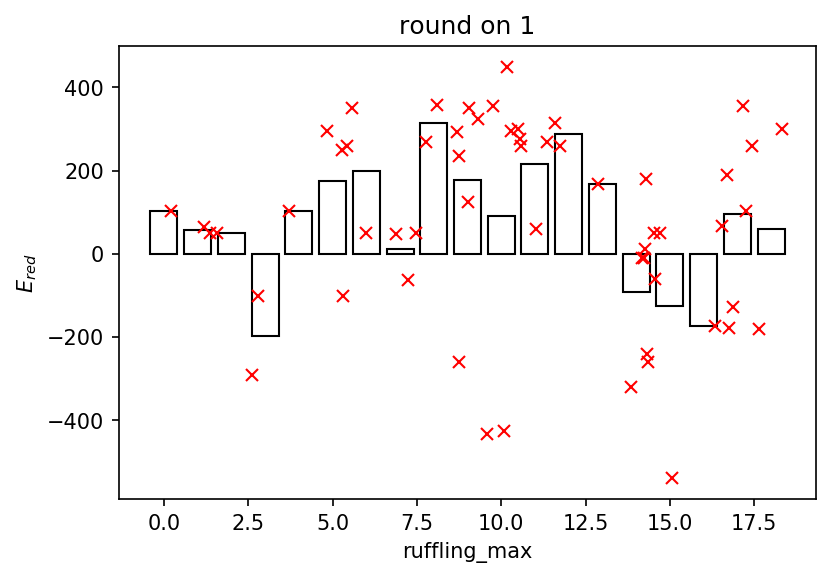

In [29]:
barpoint(df_mode_r20, "ruffling_max","Em_lit",1)

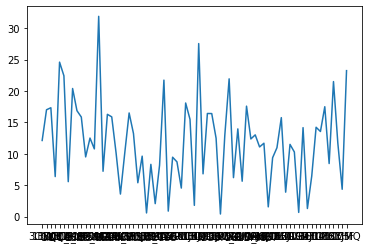

In [31]:
plt.plot(df_mode["saddling_max"])